<a href="https://colab.research.google.com/github/raiakash203/Machine-Learning/blob/Dimension-Reduction/SoftmaxClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Softmax classifier on mnist data using tensorflow.
Implementation followed from AppliedAI course

In [1]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 28kB/s 
     |████████████████████████████████| 3.2MB 45.7MB/s 
     |████████████████████████████████| 491kB 56.4MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


## SoftMaxClassfier

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets("MNIST", one_hot=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
'''
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
'''

'\nimport tensorflow as tf\nimport numpy as np\n\nmnist = tf.keras.datasets.mnist\n(train_images, train_labels), (test_images, test_labels) = mnist.load_data()\n'

In [0]:
'''
train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)
'''

'\ntrain_images = train_images.reshape(-1,784)\ntest_images = test_images.reshape(-1,784)\n'

In [0]:
'''
#For one hot encoding of the data
encoding_shape_train = (train_labels.size,train_labels.max()+1)
encoding_shape_test = (test_labels.size,test_labels.max()+1)

train_one_hot = np.zeros(encoding_shape_train)
test_one_hot = np.zeros(encoding_shape_test)

rows = np.arange(train_labels.size)
train_one_hot[rows,train_labels] = 1
rows = np.arange(test_labels.size)
test_one_hot[rows,test_labels] = 1

train_labels = train_one_hot
test_labels = test_one_hot

'''

'\n#For one hot encoding of the data\nencoding_shape_train = (train_labels.size,train_labels.max()+1)\nencoding_shape_test = (test_labels.size,test_labels.max()+1)\n\ntrain_one_hot = np.zeros(encoding_shape_train)\ntest_one_hot = np.zeros(encoding_shape_test)\n\nrows = np.arange(train_labels.size)\ntrain_one_hot[rows,train_labels] = 1\nrows = np.arange(test_labels.size)\ntest_one_hot[rows,test_labels] = 1\n\ntrain_labels = train_one_hot\ntest_labels = test_one_hot\n\n'

In [4]:
print("The number of data points in train ",mnist.train.images.shape[0],"No of pixels: ",mnist.train.images.shape[-1])

The number of data points in train  55000 No of pixels:  784


In [5]:
print("The number of data points in test ",mnist.test.images.shape[0],"shape of labels: ",mnist.test.labels.shape[-1])

The number of data points in test  10000 shape of labels:  10


In [6]:
# The below gives the list of GPUs and CPUs devices

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15414411042766936498
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17818277073171549510
physical_device_desc: "device: XLA_CPU device"
]


In [0]:
# X is a placeholder, as the name suggests it holds a space in the memory
X = tf.placeholder(tf.float32,[None,784])

# Varibales are same as that in any programing language
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
#The predicted values is denoted by y
y = tf.nn.softmax(tf.matmul(X,W)+b)

In [0]:
#y_ is the true label
y_ = tf.placeholder(tf.float32,[None,10])

#The error is given by cross_entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_* tf.log(y), reduction_indices=[1]))

In [0]:
#The train step to minimize the loss which is cross entropy in our case

train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [0]:
#Now launch a the model in a session
session = tf.InteractiveSession()

#Now we will initialize the variables we have created
tf.global_variables_initializer().run()

In [0]:
#With each step of the loop will have a minibatch of 100 random data pointsfrom training sets

for _ in range(1000):
  batch_xs,batch_ys = mnist.train.next_batch(100)
  session.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

In [13]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(session.run(accuracy,feed_dict = {X:mnist.test.images,y_:mnist.test.labels}))

0.9012


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


def plot_dynamics(x,y,y_1,ax,colors=['b']):
  ax.plot(x,y,'b',label='Train Loss')
  ax.plot(x,y_1,'r',label='Test Loss')
  if len(x)==1:
    plt.legend()
  fig.canvas.draw()

Accuracy:  0.9001


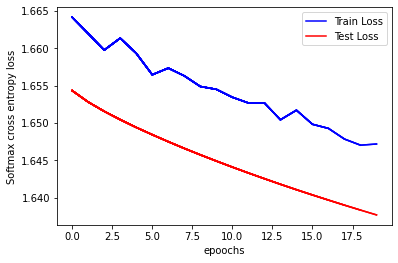

In [17]:
#Sumarizing everything into a single cell
train_epooch = 20
batch_size = 1200

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoochs')
ax.set_ylabel('Softmax cross entropy loss')

xs,ytrs,ytes = [],[],[]

for epooch in range(train_epooch):
  train_avg_er = 0 
  test_avg_er =  0
  total_batch = int(mnist.train.num_examples/batch_size)
  #Loop over all batches
  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    _,c = session.run([train_step,cross_entropy], feed_dict = {X:batch_xs , y_:batch_ys})
    train_avg_er += c/total_batch
    c = session.run(cross_entropy, feed_dict = {X:mnist.test.images, y_:mnist.test.labels})
    test_avg_er += c/total_batch
  xs.append(epooch)
  ytrs.append(train_avg_er)
  ytes.append(test_avg_er)
  plot_dynamics(xs,ytrs,ytes,ax)

plot_dynamics(xs,ytrs,ytes,ax)
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy: ", accuracy.eval({X:mnist.test.images,y_:mnist.test.labels}))